In [1]:
%pip install numpy pandas scipy matplotlib 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [3]:
def cooling_model (time, T_initial, T_ambient, k):
    return T_ambient + (T_initial - T_ambient) * np.exp(-k * time) 

In [4]:
df = pd.read_csv('dataset.csv')
df.head()

,no,timestamp,T_amb,Temp
0,0,05:45,29.2,97.3
1,1,06:00,29.2,94.8
2,2,06:15,29.1,92.8
3,3,06:30,29.0,90.7
4,4,06:45,29.0,88.9


In [5]:
df.columns = df.columns.str.strip()
df['Time'] = np.arange(len(df)) * 0.25 # Time in hours, 15 minutes intervals

In [6]:
ambient_temp = df['T_amb'].mean()
temperature = df['Temp'].values
time = df['Time'].values

k1 = 0.123
k2 = 0.110

In [7]:
temps_fitted1 = cooling_model(time, temperature[0], ambient_temp, k1)
temps_fitted2 = cooling_model(time, temperature[0], ambient_temp, k2)


In [8]:
df_k1 = pd.DataFrame({
        'Time (hours)': time,
        'Measured Temp (°C)': temperature,
        'Fitted Temp k=0.123 (°C)': temps_fitted1,
        'Difference (°C)': np.abs(temperature - temps_fitted1)
    })

df_k2 = pd.DataFrame({
        'Time (hours)': time,
        'Measured Temp (°C)': temperature,
        'Fitted Temp k=0.110 (°C)': temps_fitted2,
        'Difference (°C)': np.abs(temperature - temps_fitted2)
    })

In [9]:
df_k1

,Time (hours),Measured Temp (°C),Fitted Temp k=0.123 (°C),Difference (°C)
0,0.00,97.3,97.300000,0.000000
1,0.25,94.8,95.231738,0.431738
2,0.50,92.8,93.226106,0.426106
3,0.75,90.7,91.281209,0.581209
4,1.00,88.9,89.395208,0.495208
5,1.25,87.3,87.566319,0.266319
6,1.50,85.6,85.792812,0.192812
7,1.75,84.0,84.073010,0.073010
8,2.00,82.0,82.405288,0.405288
9,2.25,81.0,80.788068,0.211932


In [10]:
df_k2

,Time (hours),Measured Temp (°C),Fitted Temp k=0.110 (°C),Difference (°C)
0,0.00,97.3,97.300000,0.000000
1,0.25,94.8,95.447341,0.647341
2,0.50,92.8,93.644936,0.844936
3,0.75,90.7,91.891421,1.191421
4,1.00,88.9,90.185471,1.285471
5,1.25,87.3,88.525796,1.225796
6,1.50,85.6,86.911140,1.311140
7,1.75,84.0,85.340282,1.340282
8,2.00,82.0,83.812034,1.812034
9,2.25,81.0,82.325240,1.325240


In [11]:
# Goodness of fit

R_squared_k1 = 1 - (np.sum((temperature - temps_fitted1) ** 2) / np.sum((temperature - np.mean(temperature)) ** 2))
R_squared_k2 = 1 - (np.sum((temperature - temps_fitted2) ** 2) / np.sum((temperature - np.mean(temperature)) ** 2))

print(f"R-squared for k=0.123: {R_squared_k1:.4f}")
print(f"R-squared for k=0.110: {R_squared_k2:.4f}")


R-squared for k=0.123: 0.9953
R-squared for k=0.110: 0.9597


In [12]:
# RMSE Calculation
RMSE_k1 = np.sqrt(np.mean((temperature - temps_fitted1) ** 2))
RMSE_k2 = np.sqrt(np.mean((temperature - temps_fitted2) ** 2))

print(f"RMSE for k=0.123: {RMSE_k1:.4f} °C")
print(f"RMSE for k=0.110: {RMSE_k2:.4f} °C")


RMSE for k=0.123: 0.4053 °C
RMSE for k=0.110: 1.1832 °C


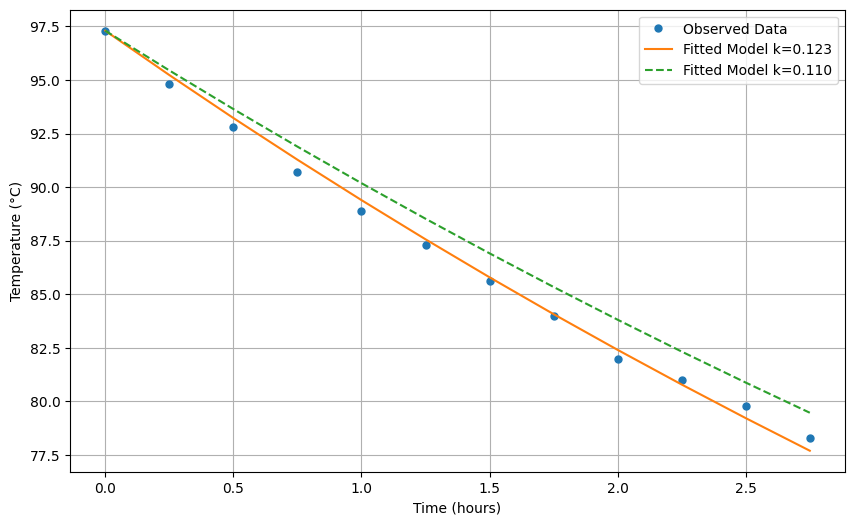

In [13]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(time, temperature, 'o', label='Observed Data', markersize=5)
plt.plot(time, temps_fitted1, '-', label='Fitted Model k=0.123')
plt.plot(time, temps_fitted2, '--', label='Fitted Model k=0.110')
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°C)')
# plt.title('Cooling Curve Fitting')
plt.legend()
plt.grid()
plt.show()

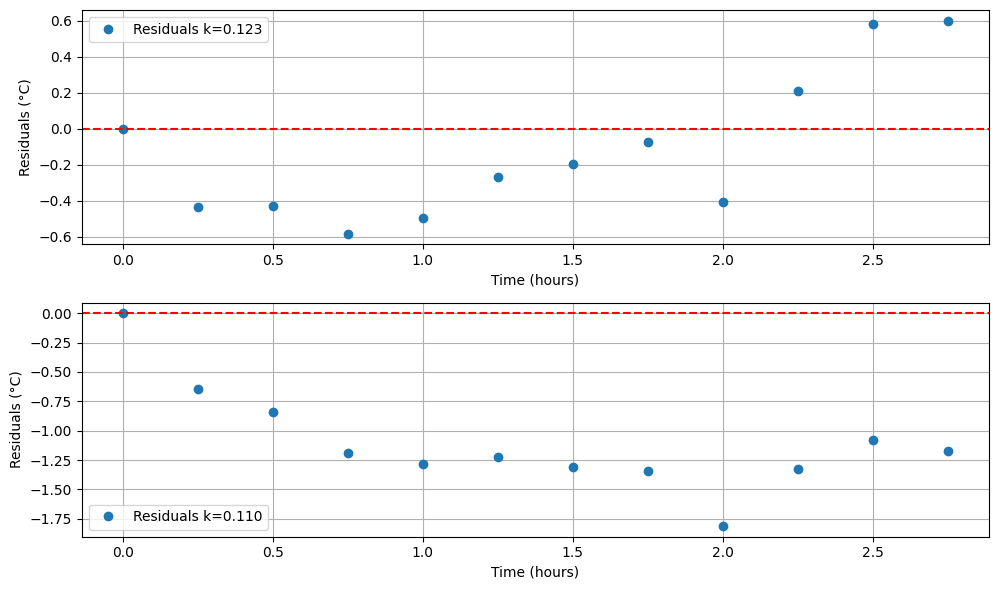

In [14]:
# Residual Analysis
residuals_k1 = temperature - temps_fitted1
residuals_k2 = temperature - temps_fitted2

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time, residuals_k1, 'o', label='Residuals k=0.123')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Time (hours)')
plt.ylabel('Residuals (°C)')
plt.legend()
plt.grid() 
plt.subplot(2, 1, 2)
plt.plot(time, residuals_k2, 'o', label='Residuals k=0.110')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Time (hours)')
plt.ylabel('Residuals (°C)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()  

In [15]:
# Extrapolation
extended_time = np.arange(0, 12.25, 0.25) # (Start, Stop, Step)
extended_temps_k1 = cooling_model(extended_time, temperature[0], ambient_temp, k1)
extended_temps_k2 = cooling_model(extended_time, temperature[0], ambient_temp, k2)  

df_extended = pd.DataFrame({
    'Time (hours)': extended_time,
    'Fitted Temp k=0.123 (°C)': extended_temps_k1,
    'Fitted Temp k=0.110 (°C)': extended_temps_k2,
    'Difference (°C)': np.abs(extended_temps_k1 - extended_temps_k2)
})

df_extended.tail(10)

,Time (hours),Fitted Temp k=0.123 (°C),Fitted Temp k=0.110 (°C),Difference (°C)
39,9.75,49.586999,52.368986,2.781987
40,10.00,48.963583,51.735095,2.771512
41,10.25,48.359045,51.118398,2.759353
42,10.50,47.772814,50.518430,2.745616
43,10.75,47.204335,49.934736,2.730400
44,11.00,46.653071,49.366874,2.713803
45,11.25,46.118500,48.814416,2.695916
46,11.50,45.600117,48.276944,2.676827
47,11.75,45.097432,47.754051,2.656619
48,12.00,44.609969,47.245341,2.635372


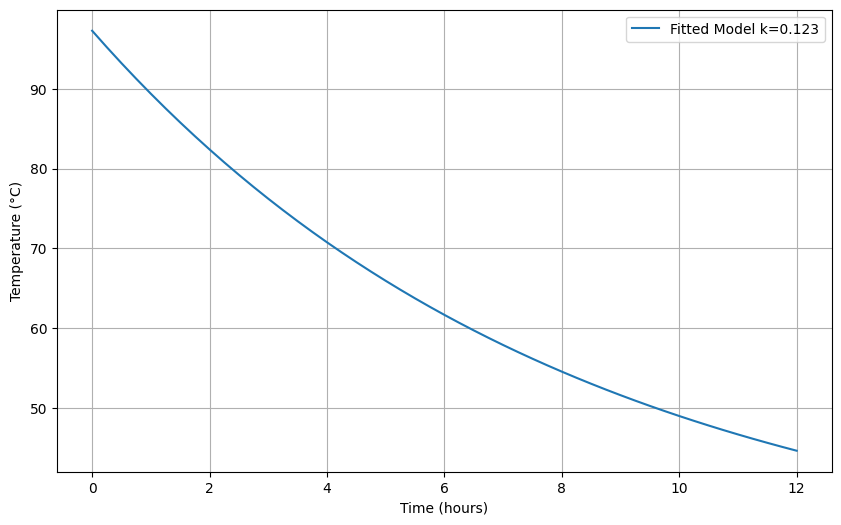

In [16]:
# Plot 12 hours extrapolation
plt.figure(figsize=(10, 6))
plt.plot(extended_time, extended_temps_k1, '-', label='Fitted Model k=0.123')
# plt.plot(extended_time, extended_temps_k2, '--', label='Fitted Model k=0.110')
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°C)')
# plt.title('12 Hours Cooling Curve Extrapolation')
plt.legend()
plt.grid()
plt.show()

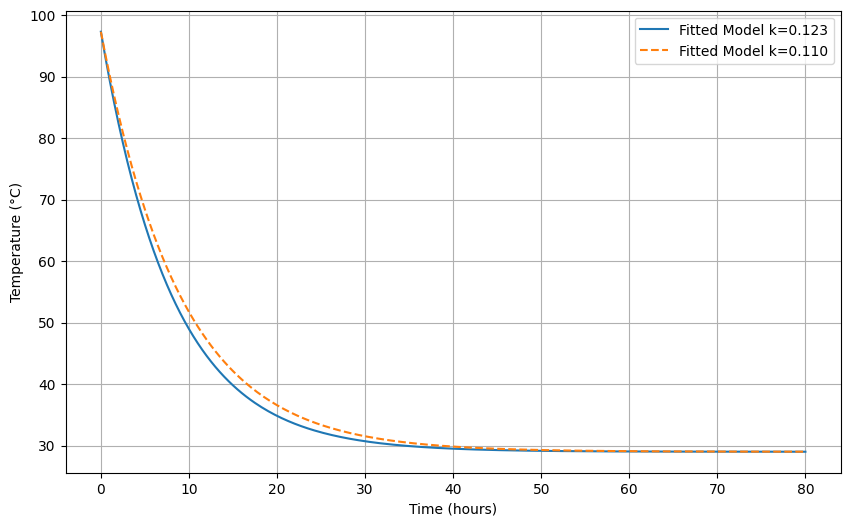

In [17]:
# Plot long-term extrapolation
long_extended_time = np.arange(0, 80.25, 0.25) # (Start, Stop, Step)
long_extended_temps_k1 = cooling_model(long_extended_time, temperature[0], ambient_temp, k1)
long_extended_temps_k2 = cooling_model(long_extended_time, temperature[0], ambient_temp, k2)   

plt.figure(figsize=(10, 6))
plt.plot(long_extended_time, long_extended_temps_k1, '-', label='Fitted Model k=0.123')
plt.plot(long_extended_time, long_extended_temps_k2, '--', label='Fitted Model k=0.110')
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°C)')
# plt.title('Long-term Cooling Curve Extrapolation')
plt.legend()
plt.grid()
plt.show()  

In [18]:
# 13th hour observation 
temp_obs_13h = 50.4
temp_k1_13h = cooling_model(13, temperature[0], ambient_temp, k1)
temp_k2_13h = cooling_model(13, temperature[0], ambient_temp, k2)


print(f"At 13 hours, Observed Temp: {temp_obs_13h} °C")
print(f"Fitted Temp k=0.123: {temp_k1_13h:.2f} °C, Difference: {np.abs(temp_obs_13h - temp_k1_13h):.2f} °C")
print(f"Fitted Temp k=0.110: {temp_k2_13h:.2f} °C, Difference: {np.abs(temp_obs_13h - temp_k2_13h):.2f} °C")

At 13 hours, Observed Temp: 50.4 °C
Fitted Temp k=0.123: 42.80 °C, Difference: 7.60 °C
Fitted Temp k=0.110: 45.34 °C, Difference: 5.06 °C


In [34]:
# time it takes to equilibrate with ambient temperature

def equilibrium_time(T_initial, T_ambient, k, epsilon):
    return (1 / k) * np.log(np.abs(T_initial - T_ambient) /epsilon)

epsilon = 1
N1 = equilibrium_time(temperature[0], ambient_temp, k1, epsilon)
N2 = equilibrium_time(temperature[0], ambient_temp, k2, epsilon)
print(f"Time to reach within {epsilon}°C of ambient temperature: {N1:.2f} hours")
print(f"Time to reach within {epsilon}°C of ambient temperature: {N2:.2f} hours")

Time to reach within 1°C of ambient temperature: 34.34 hours
Time to reach within 1°C of ambient temperature: 38.40 hours
